# Plotting of Nanopore BAM Files 

### Bam files used 
1. 
 ID: **FAB23716**   
 Centre: UBC    
 SampleType: DNA      
 Kit: Rapid    
 Pore: R9
 
2. ID: **FAB39088**   
 Centre: Notts   
 SampleType: DNA   
 Kit: Ligation   
 Pore: R9.4
 
3. ID: **FAF01169**   
 Centre: Bham   
 SampleType: Cells   
 Kit: Ligation    
 Pore: R9.4
 
4. ID: **FAB49908**
 Centre: Bham   
 SampleType: Cells   
 Kit: Rapid    
 Pore: R9.4

In [2]:
import pysam
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline

In [6]:
"""
Madeline Hawkins

BAM Class 
Functions for grabbing the Coverage, Frequency of Indels and Mismatches

Input: AlignmentFile Object of the bam file 
"""

class BAM: 
    def __init__(self, bamFile):
        self.myBAM = bamFile 
        
    def getStats(self, chr_num):
        coverage = []
        mapping_quality = []
        indel = []
        chromosome = 'chr' + str(chr_num)
        for pileup_col in self.myBAM.pileup(chromosome):
            tot_segments = pileup_col.nsegments
            for pileup_read in pileup_col.pileups:
                # Insertion
                if pileup_read.indel > 0:
                    indel.append(1)
                # Deletion 
                elif pileup_read.indel < 0: 
                    indel.append(2)
                # Not an indel 
                else: 
                    indel.append(0)
                if pileup_read.is_del or pileup_read.is_refskip or pileup_read.alignment.is_secondary: 
                    tot_segments = tot_segments - 1
                    mapping_quality.append(pileup_read.alignment.mapping_quality)
            #Ignoring telemeres 
            if tot_segments < 200: 
                coverage.append(tot_segments)
        return coverage, mapping_quality, indel



In [12]:
 
coverage = [0] * 22
mapping_quality = [0] * 22 
indel = [0] * 22
for i in range(0, 22):
    # To account for zero indexing
    curr_chromo = i + 1
    path = 'chr' + str(curr_chromo) + '/chr' + str(curr_chromo) + '.bam'

    bamFile = pysam.AlignmentFile(path, 'rb')

    newBam = BAM(bamFile)
    coverage[i], mapping_quality[i], indel[i] = newBam.getStats(curr_chromo)


## Coverage Histogram
Creating a histogram plot for each chromosome and the total number of coverage accross each position in the chromosome. 

Finds: Most of the chromosome positions in this bam file have coverage of one.  

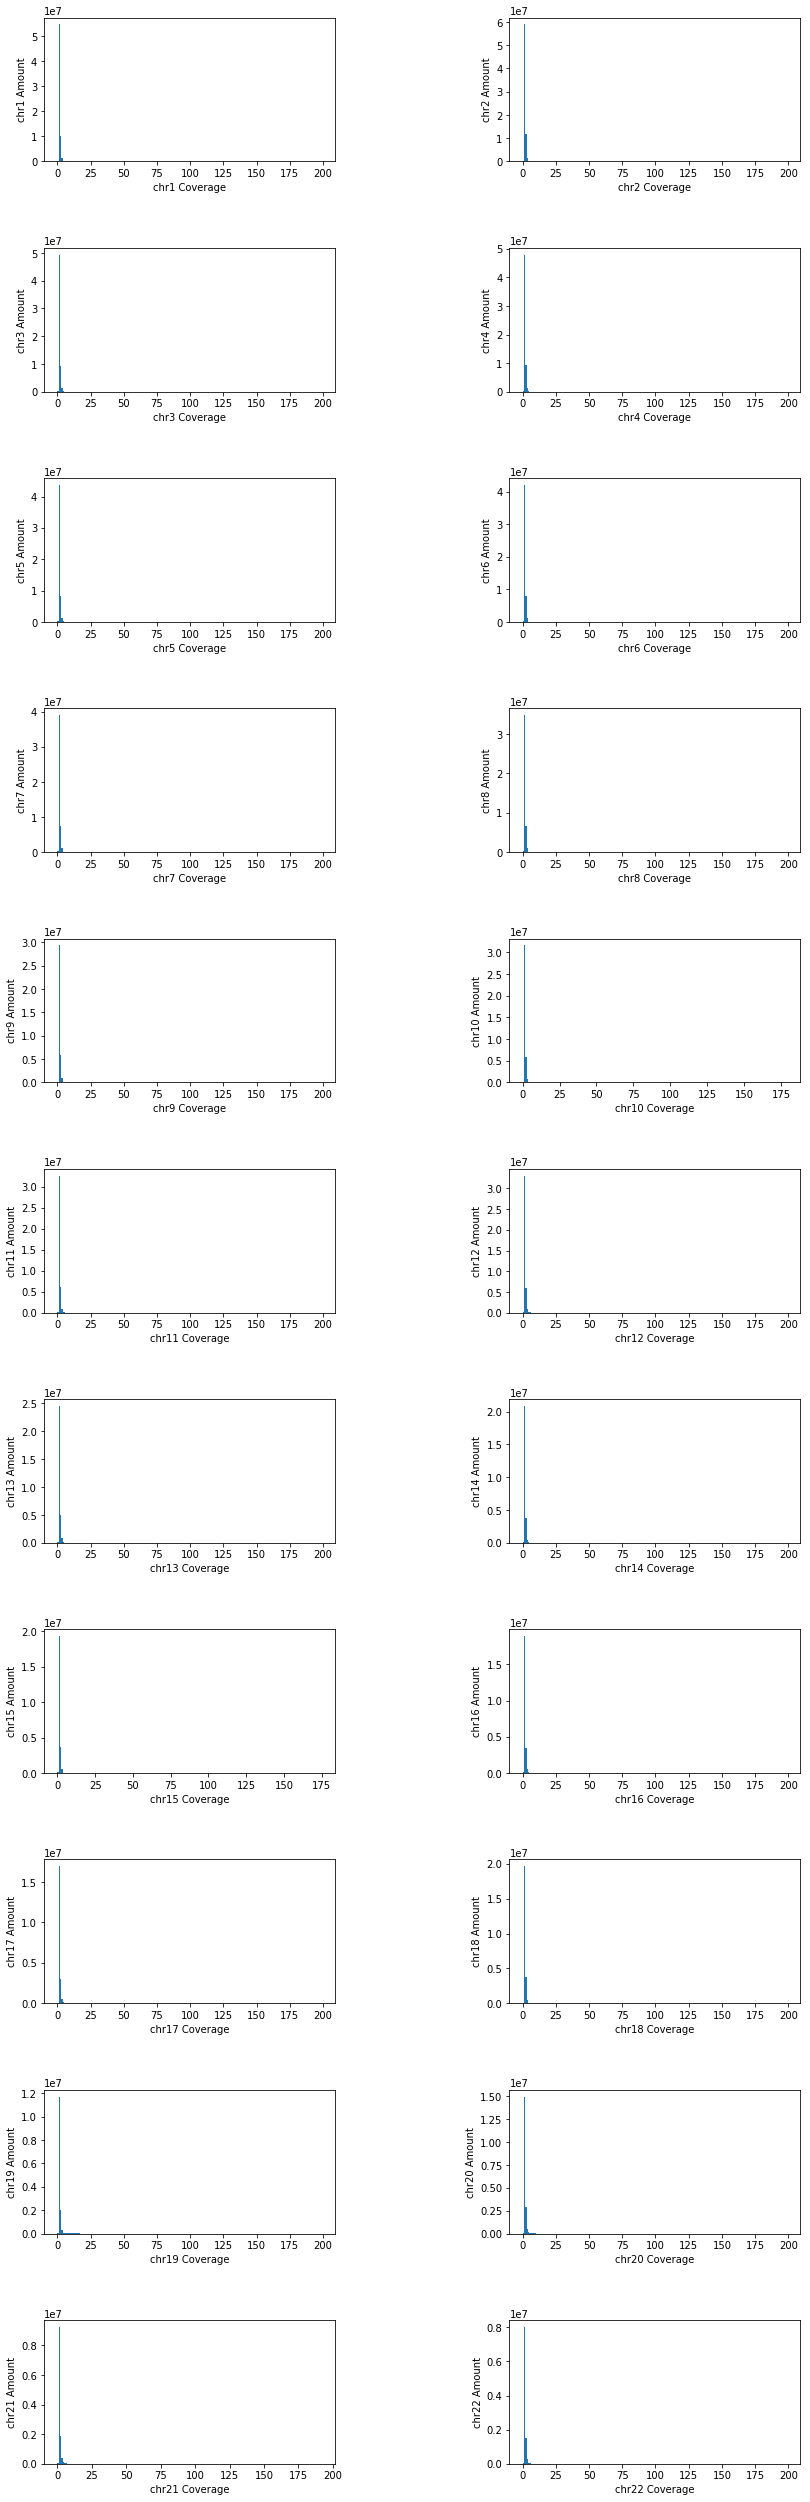

In [26]:
fig, axs = plt.subplots(11,2,figsize=(15, 45))
fig.subplots_adjust(left=0.2, wspace=0.6, hspace=0.6)
# Set it to -1 to make code a little cleaner. 
l_side = -1
for i in range(0, 22):
    # Some math to set up where to position the plots 
    r_side = i % 2 
    if i % 2 == 0: 
        l_side += 1
    axs[l_side, r_side].hist(coverage[i], bins=200)
    axs[l_side, r_side].set_xlabel('chr' + str(i + 1) + ' Coverage')
    axs[l_side, r_side].set_ylabel('chr' + str(i + 1) + ' Amount')

plt.show()

### Coverage Histogram Continued 
In the cell above we have seen that most of the coverage is at one but let's zoom in a little to check out the amount of coverage that is more than one. 

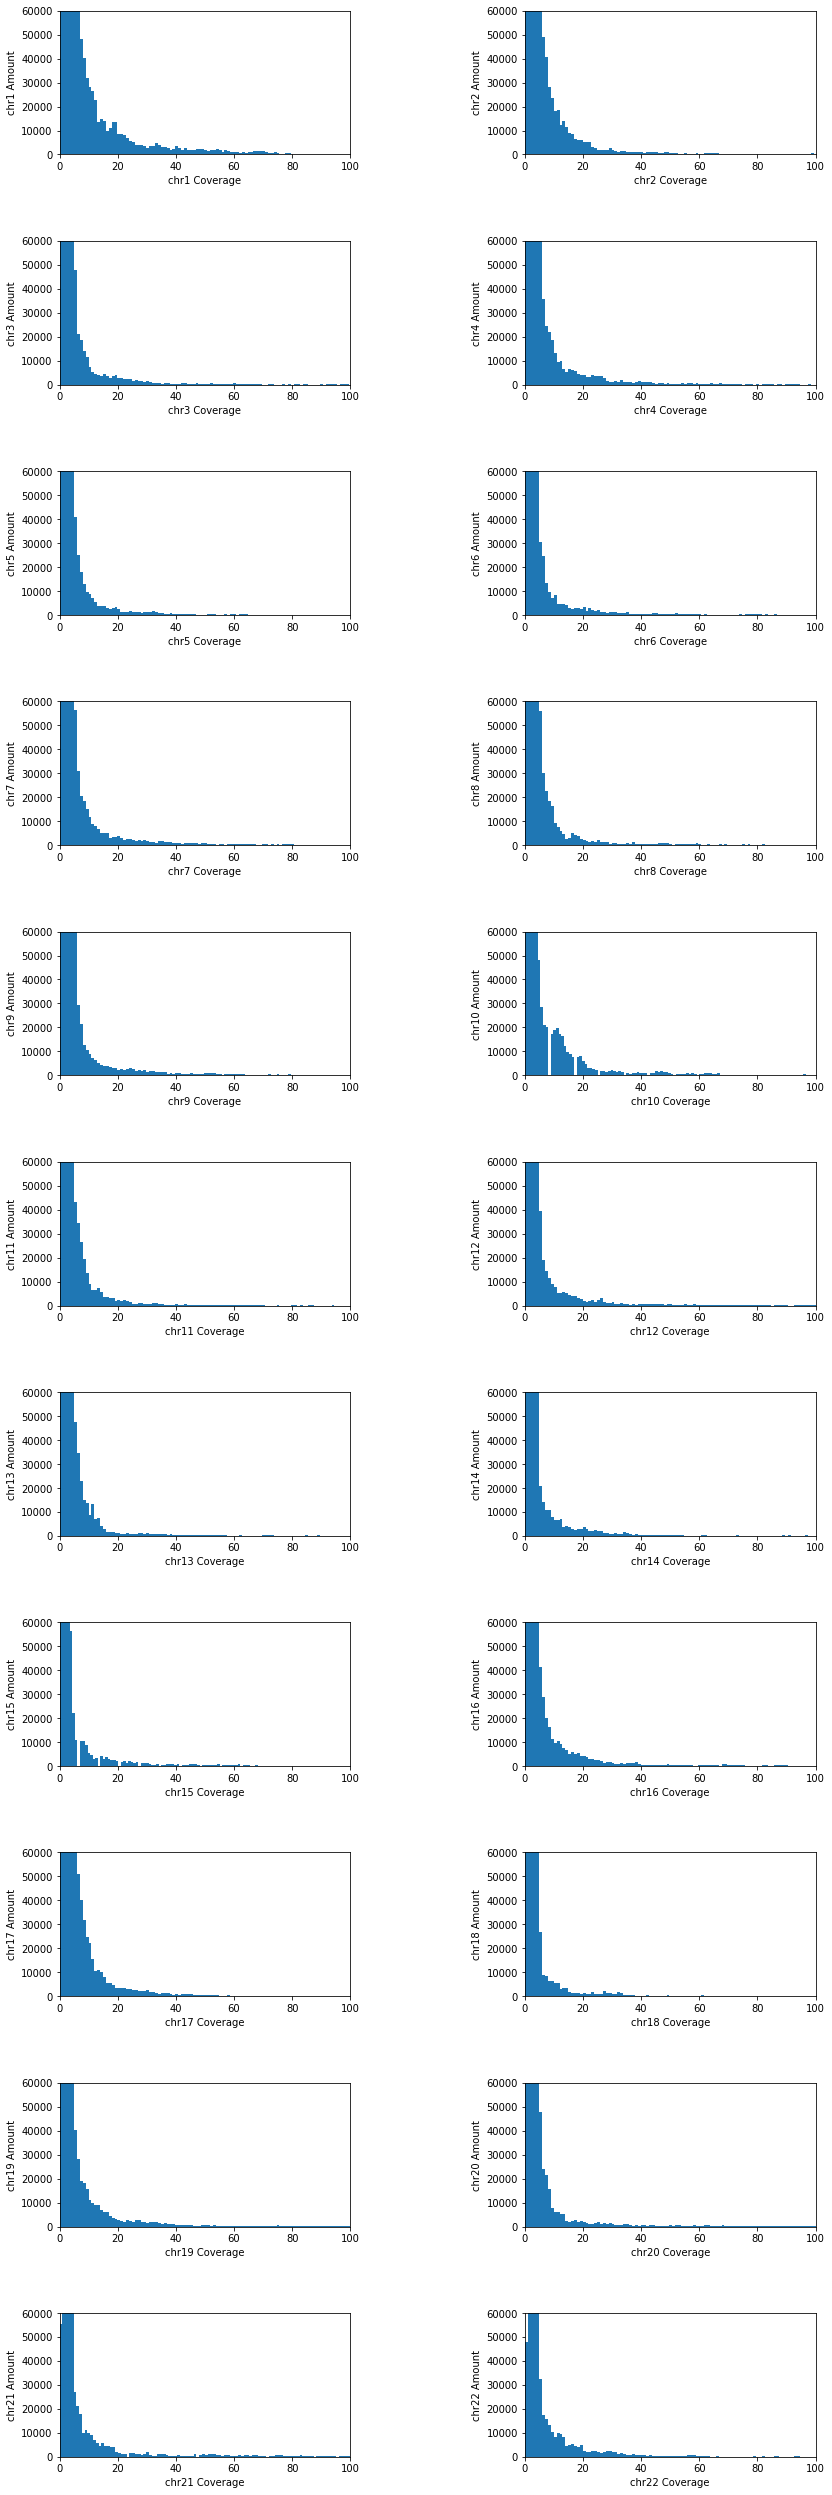

In [28]:
fig, axs = plt.subplots(11,2,figsize=(15, 45))
fig.subplots_adjust(left=0.2, wspace=0.6, hspace=0.6)
# Set it to -1 to make code a little cleaner. 
l_side = -1
for i in range(0, 22):
    # Some math to set up where to position the plots 
    r_side = i % 2 
    if i % 2 == 0: 
        l_side += 1
    axs[l_side, r_side].hist(coverage[i], bins=200)
    axs[l_side, r_side].set_xlabel('chr' + str(i + 1) + ' Coverage')
    axs[l_side, r_side].set_ylabel('chr' + str(i + 1) + ' Amount')
    axs[l_side, r_side].set_xlim(0, 100)
    axs[l_side, r_side].set_ylim(0, 60000)

plt.show()

## Coverage vs. Position 
Creates scatter plots for each chromosome that shows it's coverage at a specific position. 

Note: For this I took out any coverage that was greater than 200 to account for telemers. 

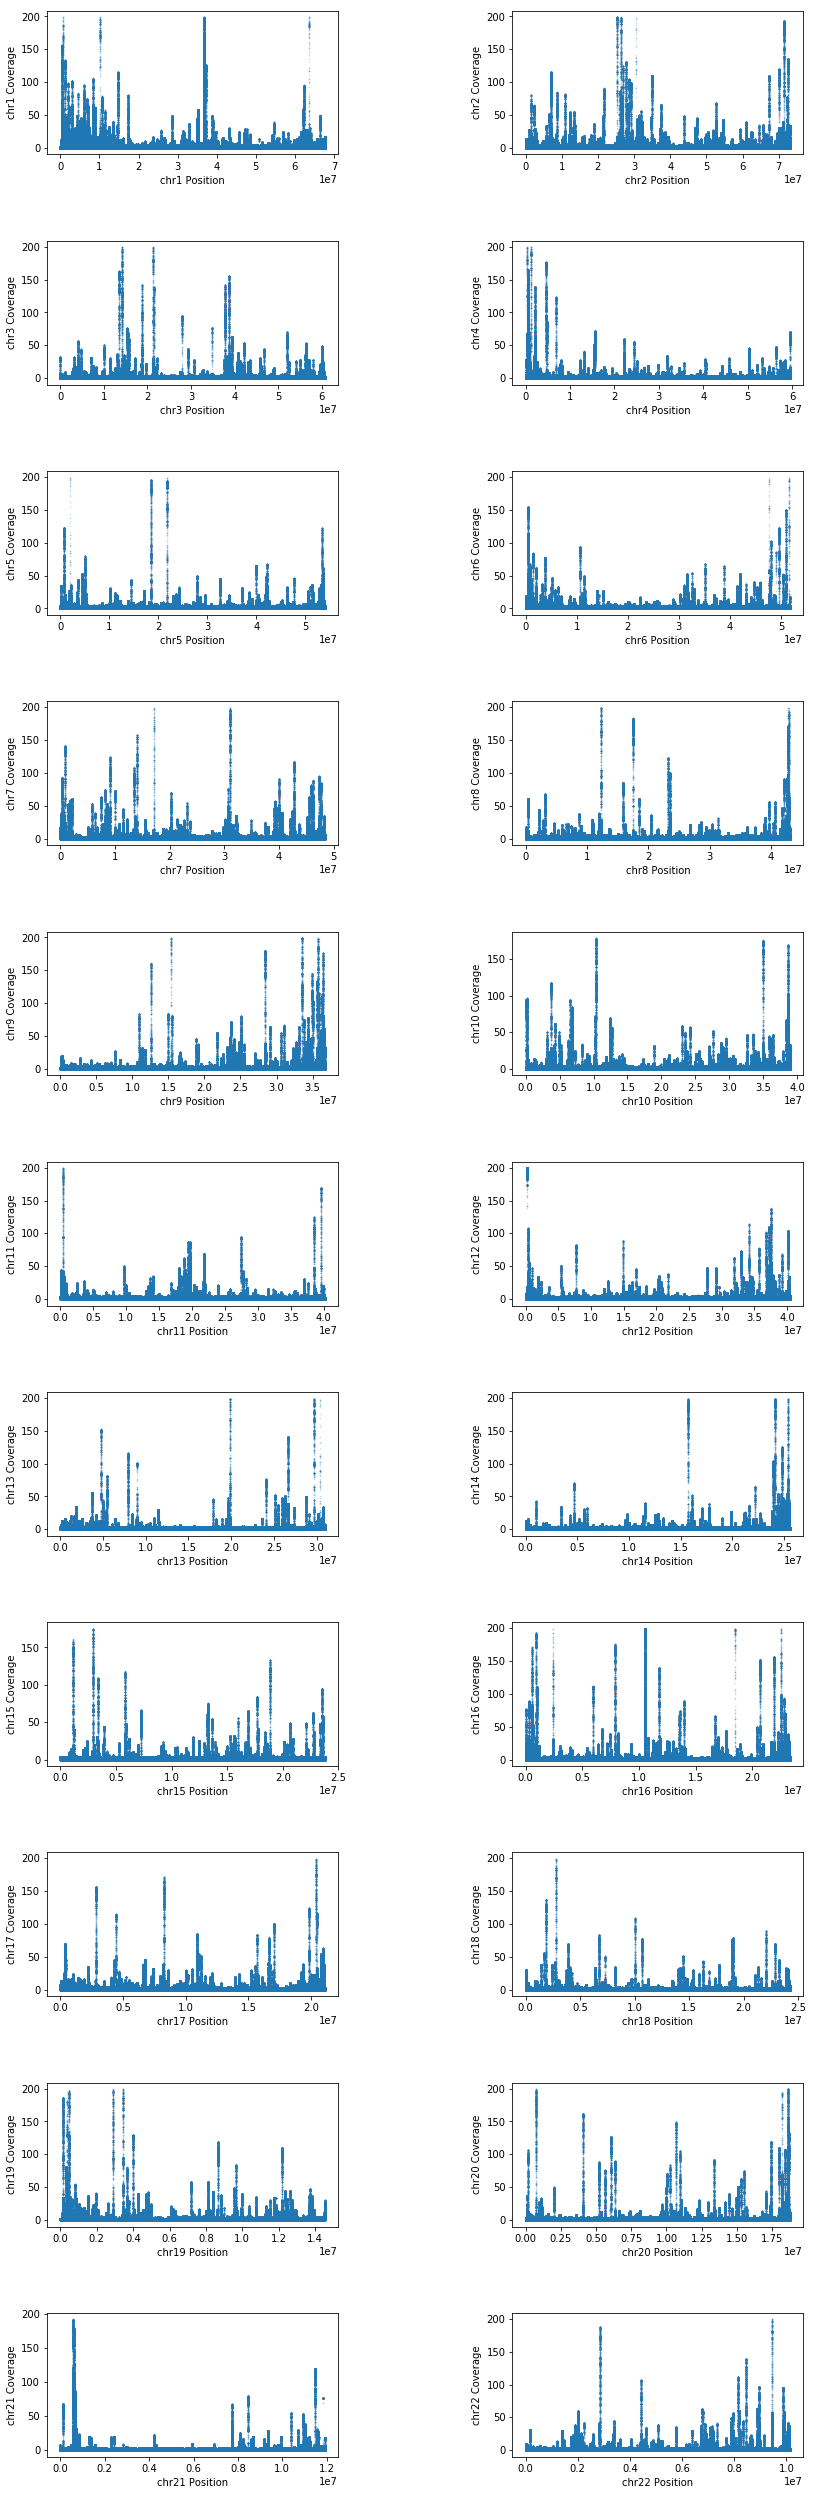

In [29]:
fig, axs = plt.subplots(11,2,figsize=(15, 45))
fig.subplots_adjust(left=0.2, wspace=0.6, hspace=0.6)
# Set it to -1 to make code a little cleaner. 
l_side = -1
for i in range(0, 22):
    # Some math to set up where to position the plots 
    r_side = i % 2 
    if i % 2 == 0: 
        l_side += 1
        
    x = range(0, len(coverage[i]))
    y = coverage[i]
    axs[l_side, r_side].set_xlabel('chr' + str(i + 1) + ' Position')
    axs[l_side, r_side].set_ylabel('chr' + str(i + 1) + ' Coverage')
    axs[l_side, r_side].scatter(x, y, 0.5, alpha=0.2)

plt.show()


# x = range(0, len(coverage))
# y = coverage
# plt.xlabel('Position')
# plt.ylabel('Coverage')
# plt.scatter(x, y, 0.5, alpha=0.2)
# plt.show()

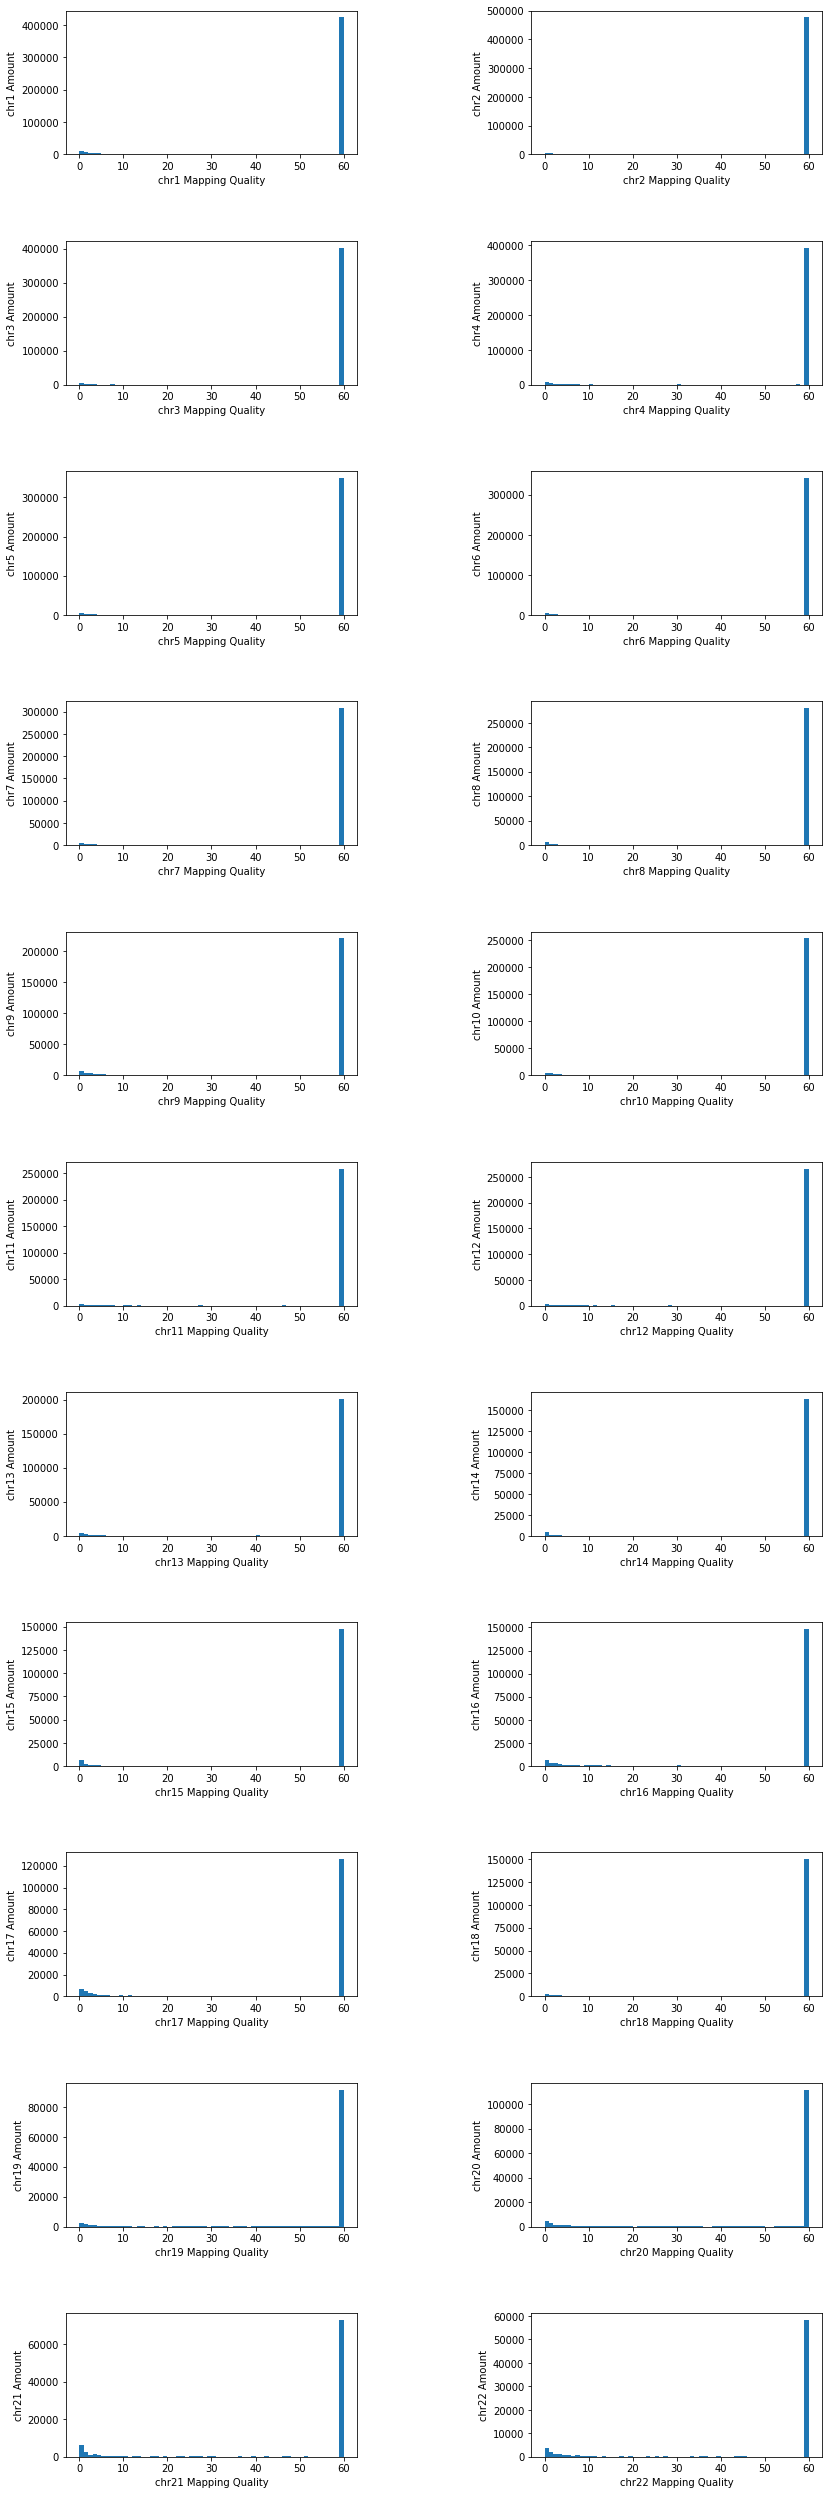

In [31]:
fig, axs = plt.subplots(11,2,figsize=(15, 45))
fig.subplots_adjust(left=0.2, wspace=0.6, hspace=0.6)
# Set it to -1 to make code a little cleaner. 
l_side = -1
for i in range(0, 22):
    # Some math to set up where to position the plots 
    r_side = i % 2 
    if i % 2 == 0: 
        l_side += 1
    axs[l_side, r_side].hist(mapping_quality[i], bins=60)
    axs[l_side, r_side].set_xlabel('chr' + str(i + 1) + ' Mapping Quality')
    axs[l_side, r_side].set_ylabel('chr' + str(i + 1) + ' Amount')

plt.show()



# plt.hist(mapping_quality, bins=60)
# plt.xlabel('Mapping Quality')
# plt.ylabel('Amount')
# plt.show()


Like in coverage, mapping quality is mostly 60 but lets zoom in on the others and see what we see. 

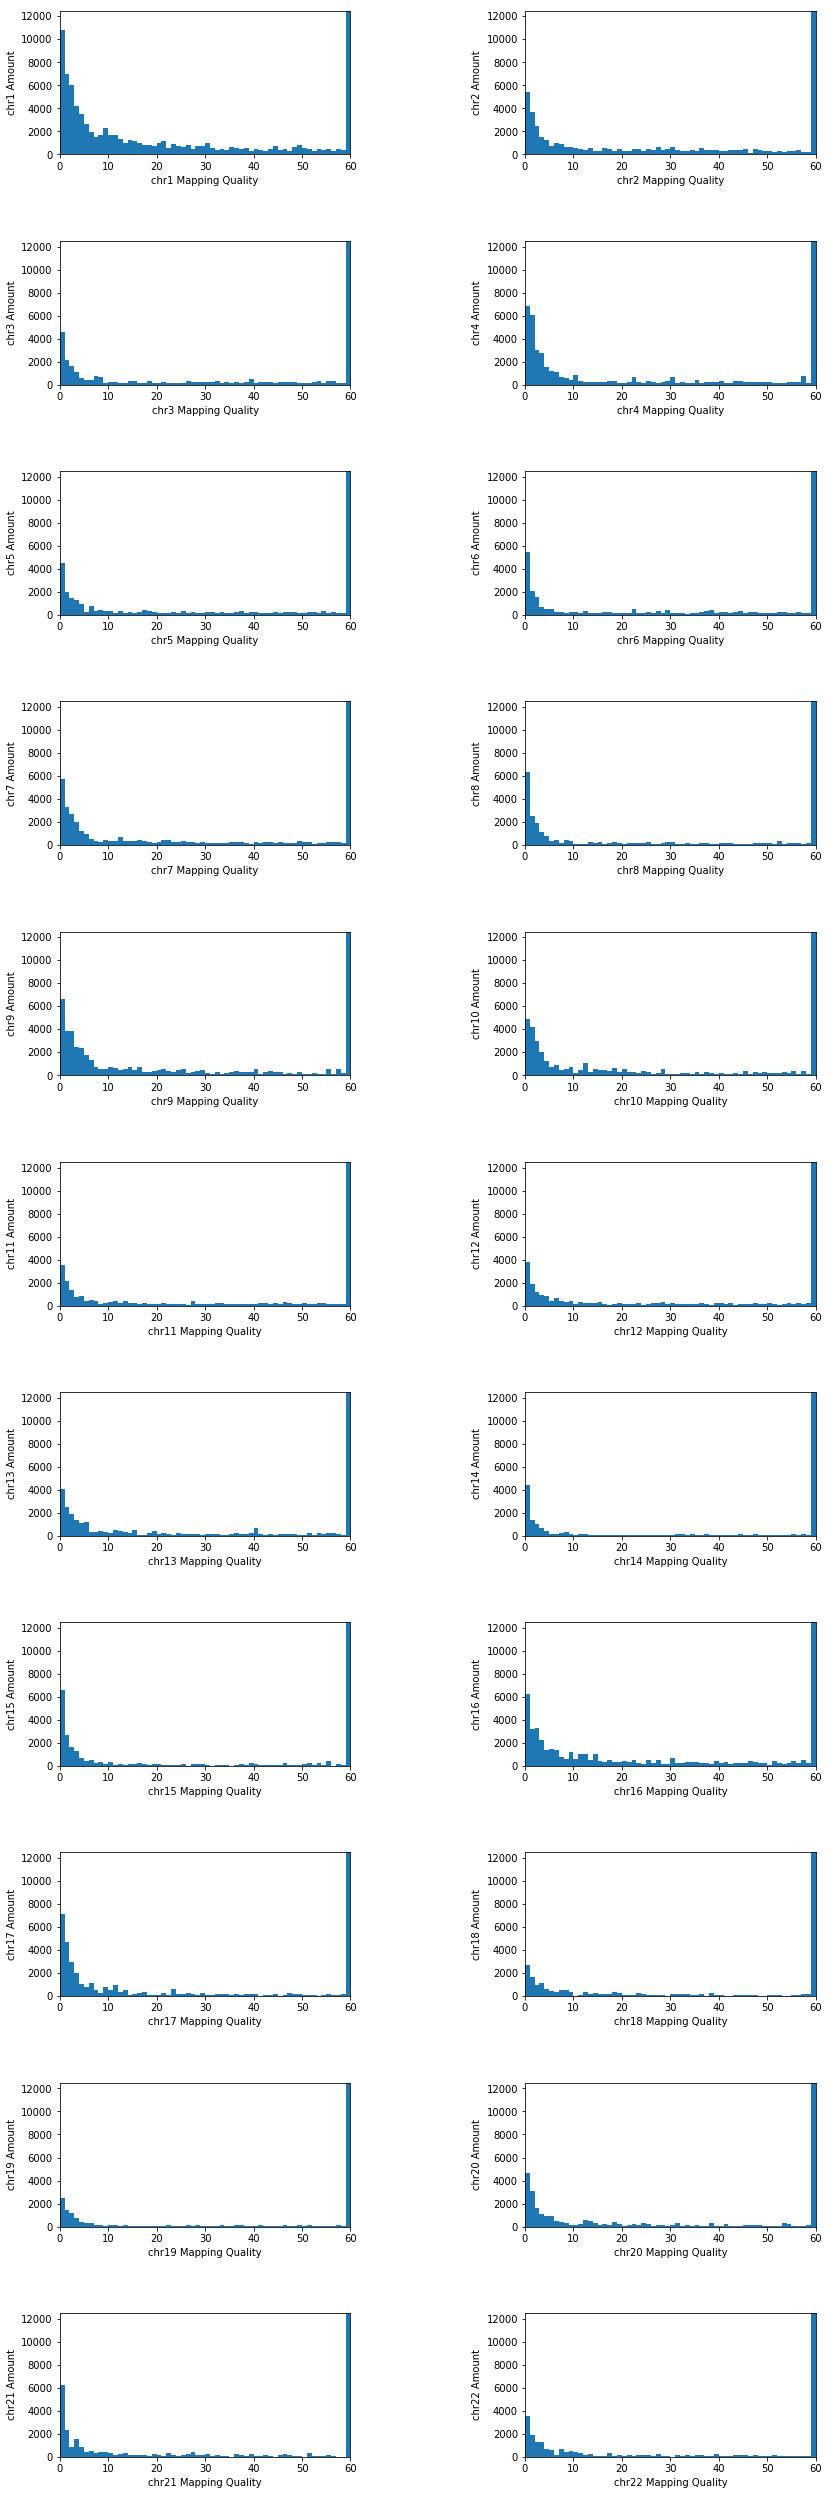

In [32]:
fig, axs = plt.subplots(11,2,figsize=(15, 45))
fig.subplots_adjust(left=0.2, wspace=0.6, hspace=0.6)
# Set it to -1 to make code a little cleaner. 
l_side = -1
for i in range(0, 22):
    # Some math to set up where to position the plots 
    r_side = i % 2 
    if i % 2 == 0: 
        l_side += 1
    axs[l_side, r_side].hist(mapping_quality[i], bins=60)
    axs[l_side, r_side].set_xlabel('chr' + str(i + 1) + ' Mapping Quality')
    axs[l_side, r_side].set_ylabel('chr' + str(i + 1) + ' Amount')
    axs[l_side, r_side].set_xlim(0, 60)
    axs[l_side, r_side].set_ylim(0, 12500)

plt.show()


# plt.hist(mapping_quality, bins=60)
# plt.xlabel('Mapping Quality')
# plt.ylabel('Amount')
# plt.axis([0, 60, 0, 12500])
# plt.show()

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22


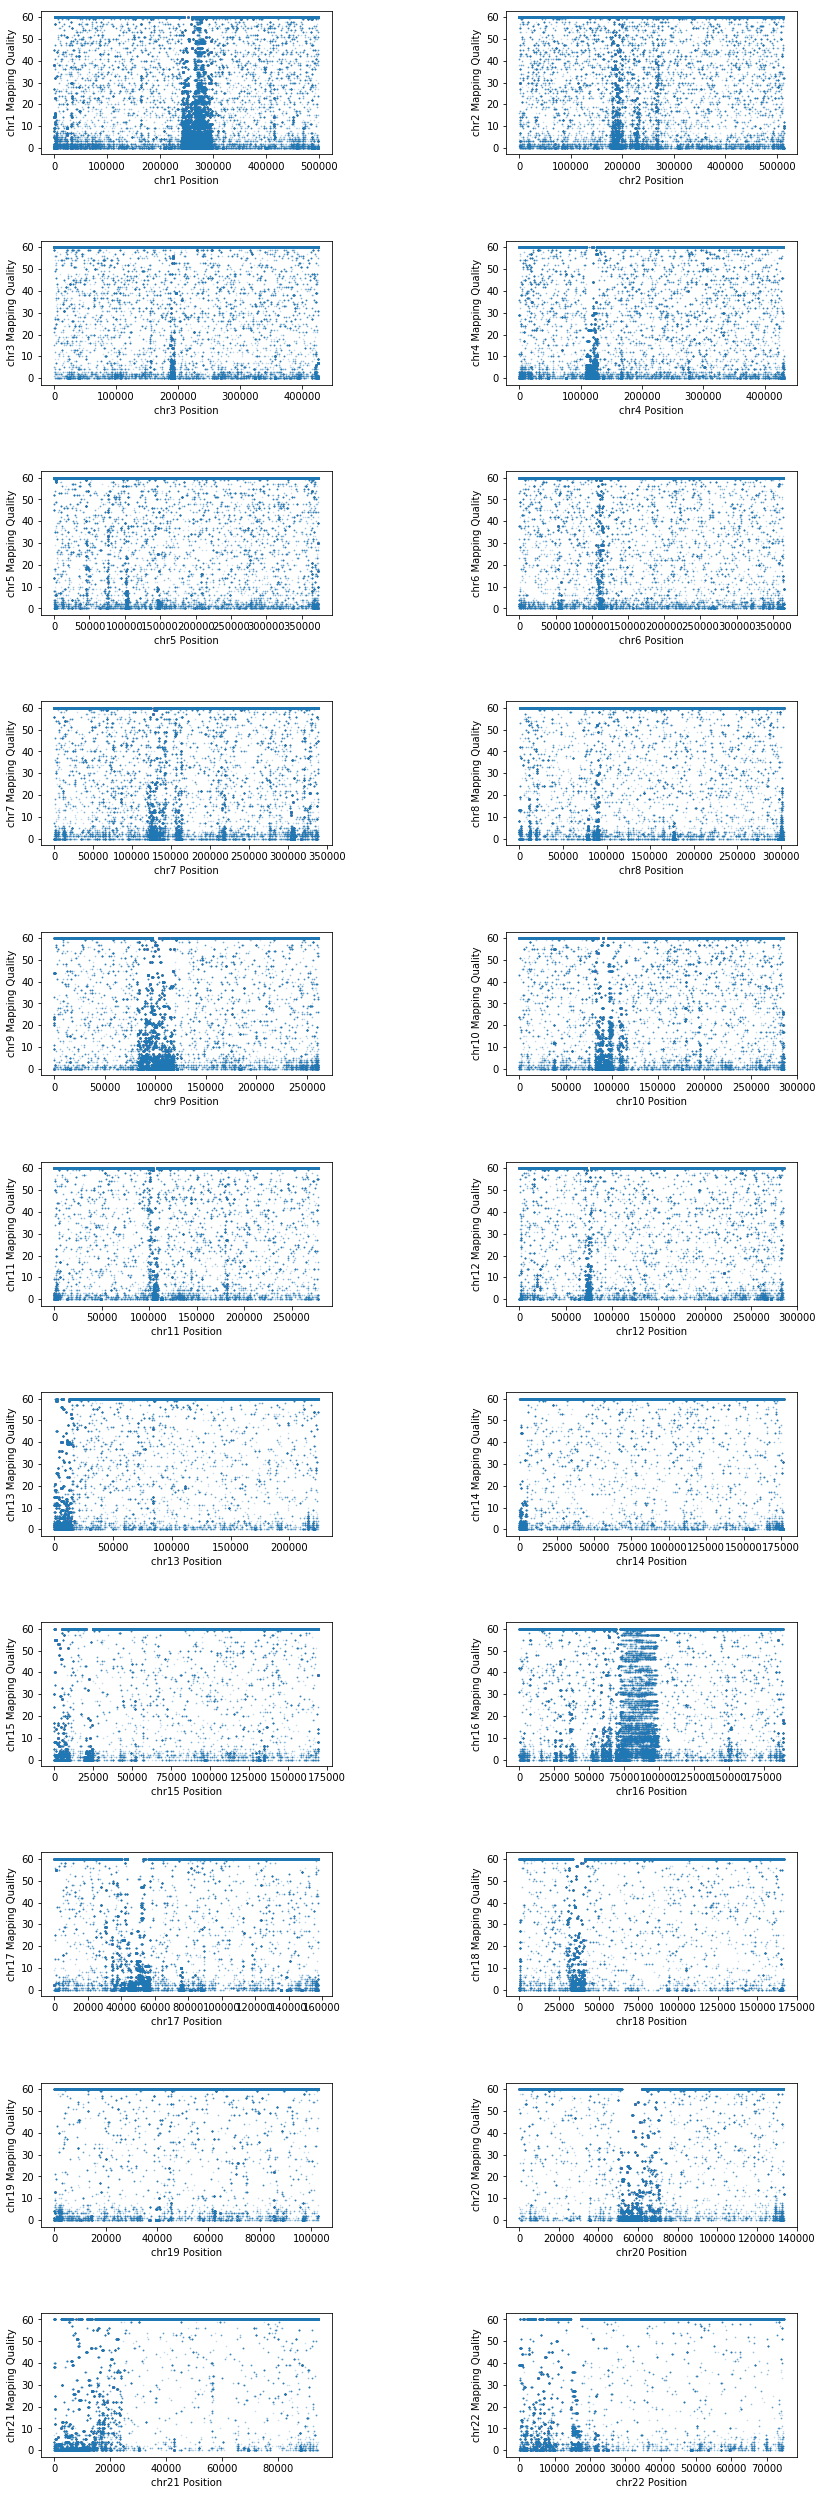

In [30]:
"""
Mapping Quality based on position 

Why does the mapping quality dip in the middle hmmmmm. 
"""
fig, axs = plt.subplots(11,2,figsize=(15, 45))
fig.subplots_adjust(left=0.2, wspace=0.6, hspace=0.6)
# Set it to -1 to make code a little cleaner. 
l_side = -1
for i in range(0, 22):
    # Some math to set up where to position the plots 
    r_side = i % 2 
    if i % 2 == 0: 
        l_side += 1
        
    x = range(0, len(mapping_quality[i]))
    y = mapping_quality[i]
    axs[l_side, r_side].set_xlabel('chr' + str(i + 1) + ' Position')
    axs[l_side, r_side].set_ylabel('chr' + str(i + 1) + ' Mapping Quality')
    axs[l_side, r_side].scatter(x, y, 0.5, alpha=0.2)
    print('chr' + str(i + 1))

plt.show()


# x = range(0, len(mapping_quality))
# y = mapping_quality
# plt.xlabel('Position')
# plt.ylabel('Mapping Quality')
# plt.scatter(x, y, 0.5, alpha=0.2)
# plt.show()

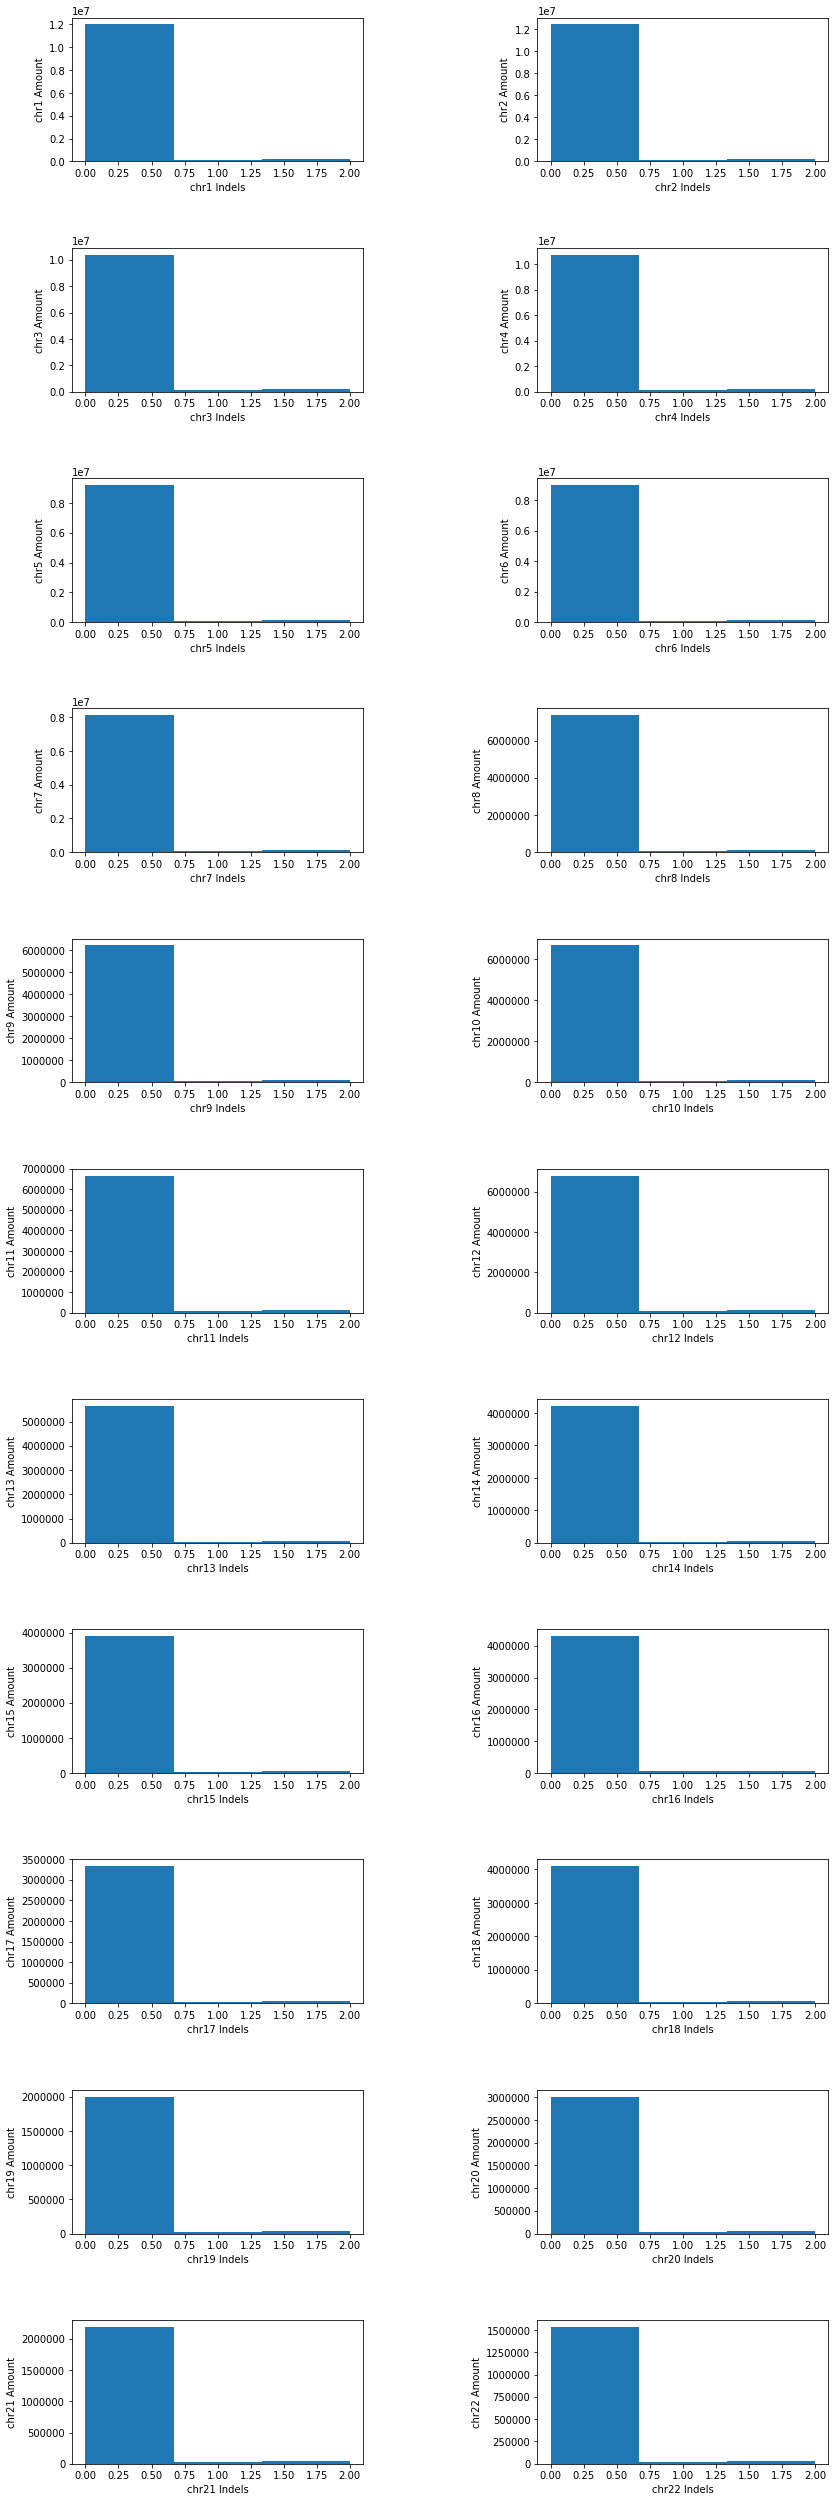

In [33]:
"""
Mostly matching
"""
fig, axs = plt.subplots(11,2,figsize=(15, 45))
fig.subplots_adjust(left=0.2, wspace=0.6, hspace=0.6)
# Set it to -1 to make code a little cleaner. 
l_side = -1
for i in range(0, 22):
    # Some math to set up where to position the plots 
    r_side = i % 2 
    if i % 2 == 0: 
        l_side += 1
    axs[l_side, r_side].hist(indel[i], bins=3)
    axs[l_side, r_side].set_xlabel('chr' + str(i + 1) + ' Indels')
    axs[l_side, r_side].set_ylabel('chr' + str(i + 1) + ' Amount')

plt.show()

# plt.hist(indel, bins=3)
# plt.xlabel('Indels')
# plt.ylabel('Amount')
# plt.show()

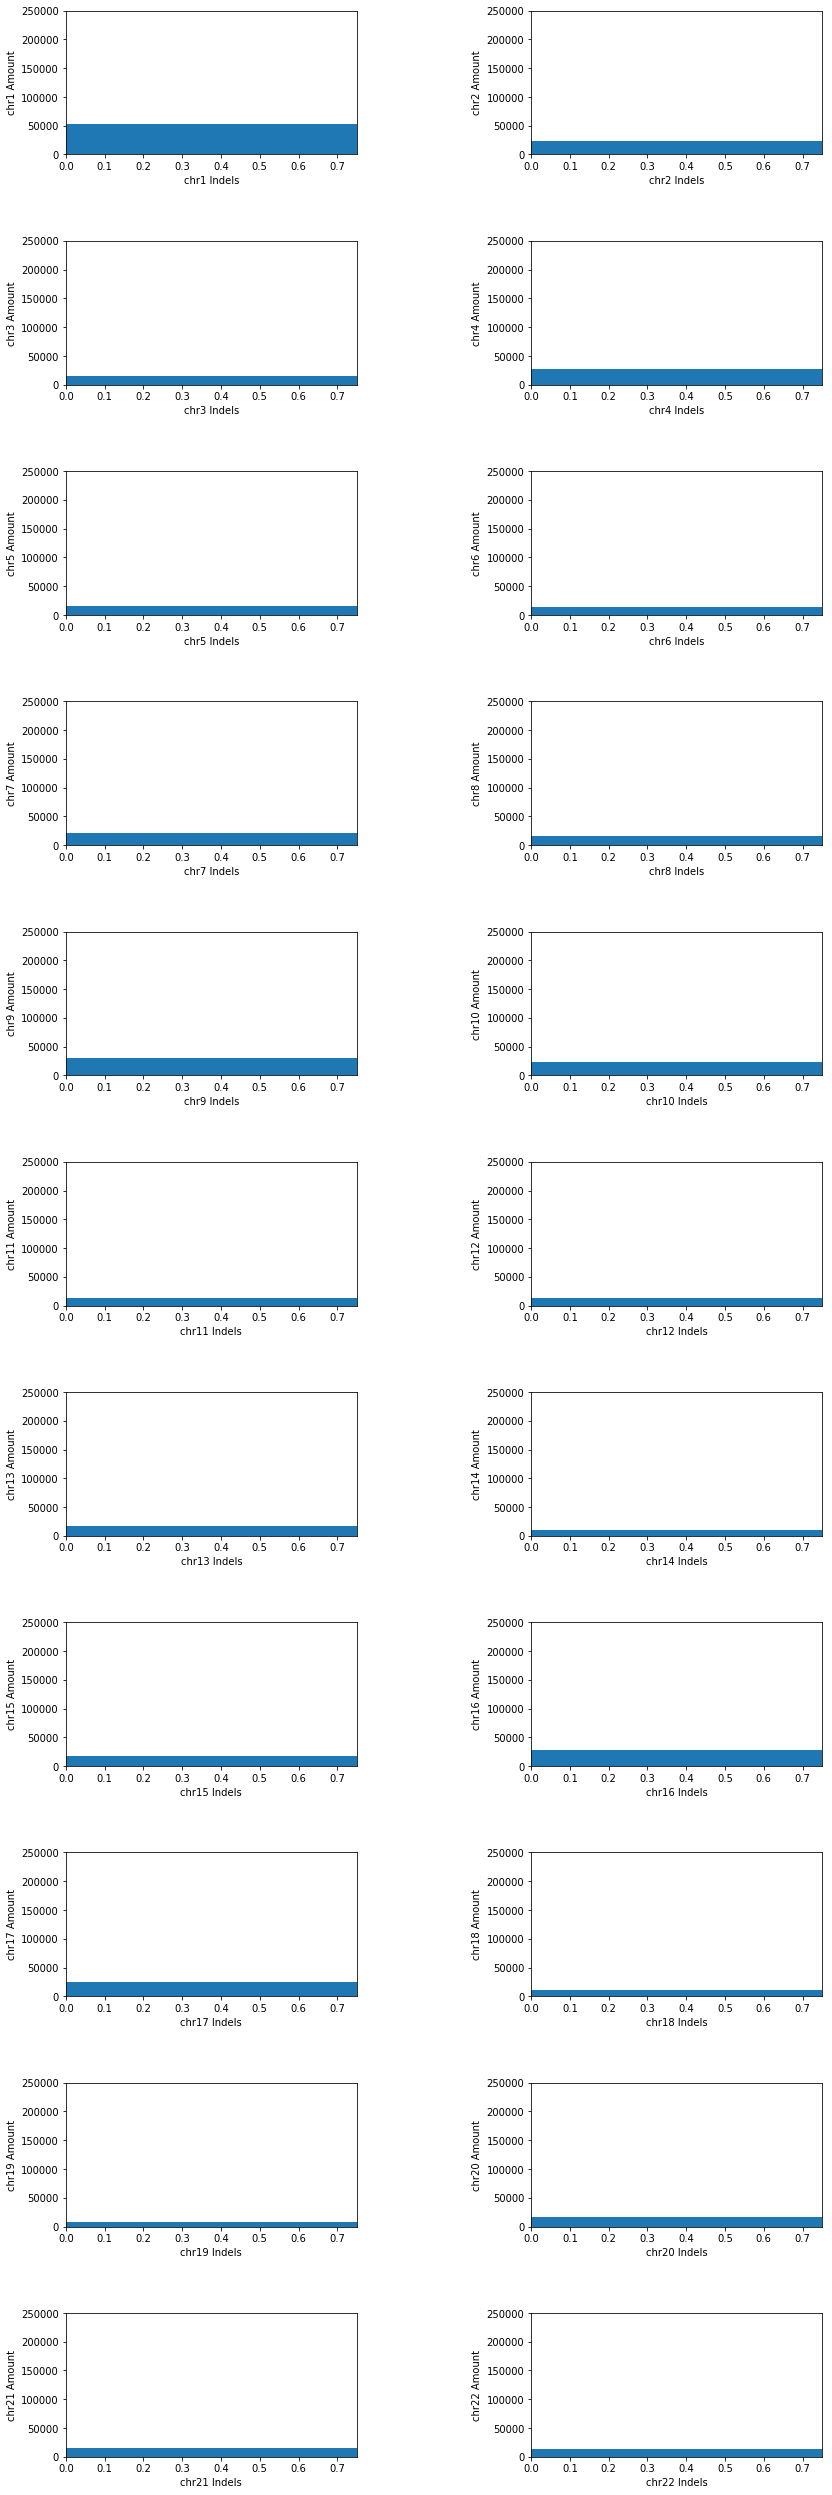

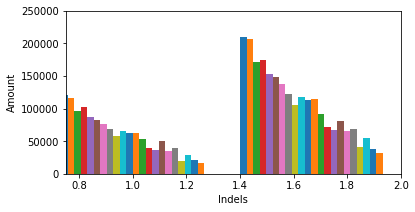

In [35]:
"""
Zooming in on the indels 
"""
fig, axs = plt.subplots(11,2,figsize=(15, 45))
fig.subplots_adjust(left=0.2, wspace=0.6, hspace=0.6)
# Set it to -1 to make code a little cleaner. 
l_side = -1
for i in range(0, 22):
    # Some math to set up where to position the plots 
    r_side = i % 2 
    if i % 2 == 0: 
        l_side += 1
    axs[l_side, r_side].hist(mapping_quality[i], bins=3)
    axs[l_side, r_side].set_xlabel('chr' + str(i + 1) + ' Indels')
    axs[l_side, r_side].set_ylabel('chr' + str(i + 1) + ' Amount')
    axs[l_side, r_side].set_xlim(0, 0.75)
    axs[l_side, r_side].set_ylim(0, 250000)
    
plt.show()

# Showing them all together 
plt.hist(indel, bins=3)
plt.xlabel('Indels')
plt.ylabel('Amount')
plt.axis([0.75, 2, 0, 250000])
plt.show()